<a href="https://colab.research.google.com/github/O-bit-O/ML-projects/blob/main/Sentiment%20Analysis%20-%20IMDB%20movie%20review/sentiment_analysis_IMDB_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn import preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score
import os
from google.colab import drive
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Dataset/IMDB Dataset.csv')

print(data.shape)
data.head(20)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
data['review_length'] = data['review'].apply(len)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         50000 non-null  object
 1   sentiment      50000 non-null  object
 2   review_length  50000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
data['review'].isnull().sum()
data.duplicated().sum()

418

In [ ]:
data=data.drop_duplicates()
data.duplicated().sum()

0

In [ ]:
data.describe()

,review_length
count,49582.000000
mean,1310.568230
std,990.762238
min,32.000000
25%,699.000000
50%,971.000000
75%,1592.000000
max,13704.000000


In [ ]:
#Check for missing values in rows
missing_rows = data[data.isna().any(axis=1)]

print("Rows with missing values:")
print(missing_rows)
#check data types
print("Data types of columns:")
print(data.dtypes)


Rows with missing values:
Empty DataFrame
Columns: [review, sentiment, review_length]
Index: []
Data types of columns:
review           object
sentiment        object
review_length     int64
dtype: object


In [ ]:
data['sentiment']=data['sentiment'].replace({'positive': 1, 'negative': 0})
#changing data type to numeric
data['sentiment'] = pd.to_numeric(data['sentiment'], errors='coerce')
data.dtypes

review           object
sentiment         int64
review_length     int64
dtype: object

In [ ]:
data['sentiment'].value_counts()
print(len(data))

49582


In [ ]:
data['review'] = data['review'].str.replace('<br /><br />', '')

In [ ]:
data.head(5)
actual_values = data['sentiment'].values

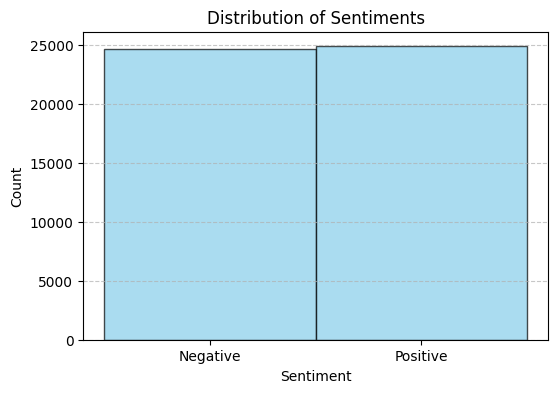

In [ ]:
#histogram
plt.figure(figsize=(6, 4))
plt.hist(data['sentiment'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Negative', 'Positive'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

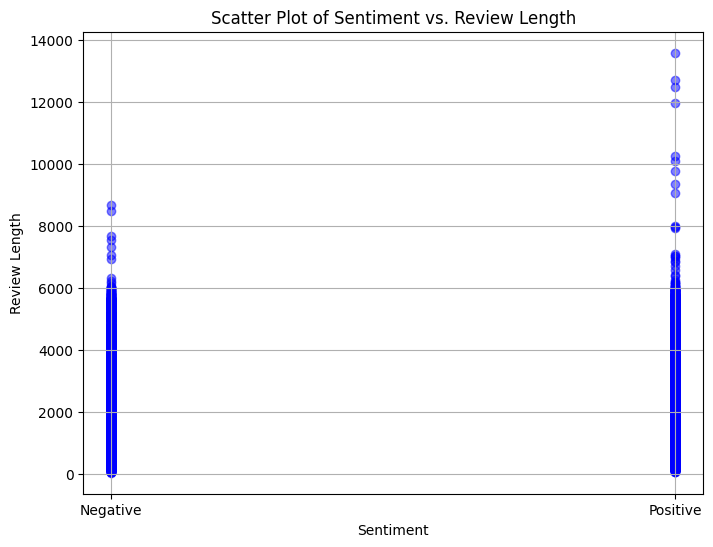

In [ ]:
data['review_length'] = data['review'].apply(len)

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['sentiment'], data['review_length'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Sentiment vs. Review Length')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.grid(True)
plt.show()


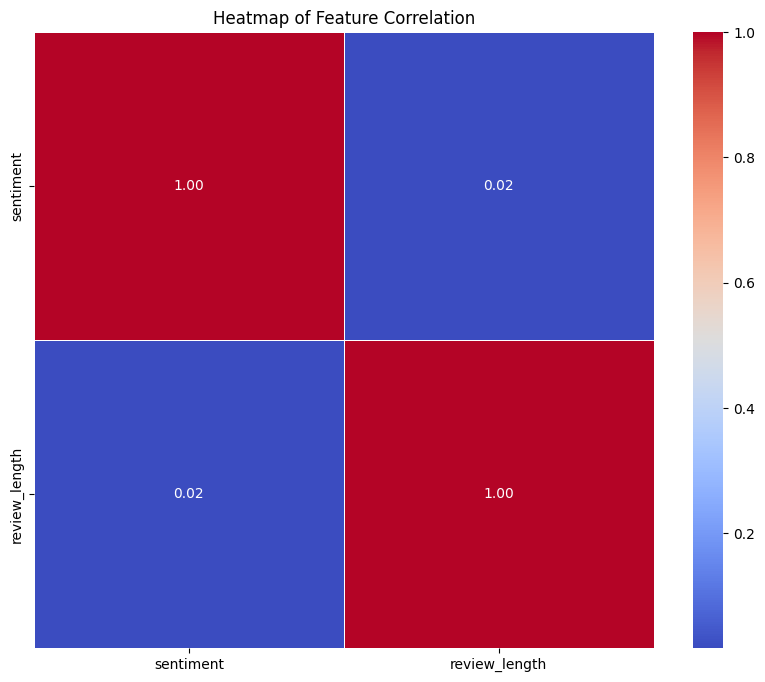

In [ ]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

#Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

#Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Feature Correlation')
plt.show()

In [ ]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate mean, median, and standard deviation
mean_values = numeric_data.mean()
median_values = numeric_data.median()
std_values = numeric_data.std()

# Print the results
print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("\nStandard deviation values:")
print(std_values)

Mean values:
sentiment           0.501876
review_length    1286.314832
dtype: float64

Median values:
sentiment          1.0
review_length    955.0
dtype: float64

Standard deviation values:
sentiment          0.500002
review_length    972.188672
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

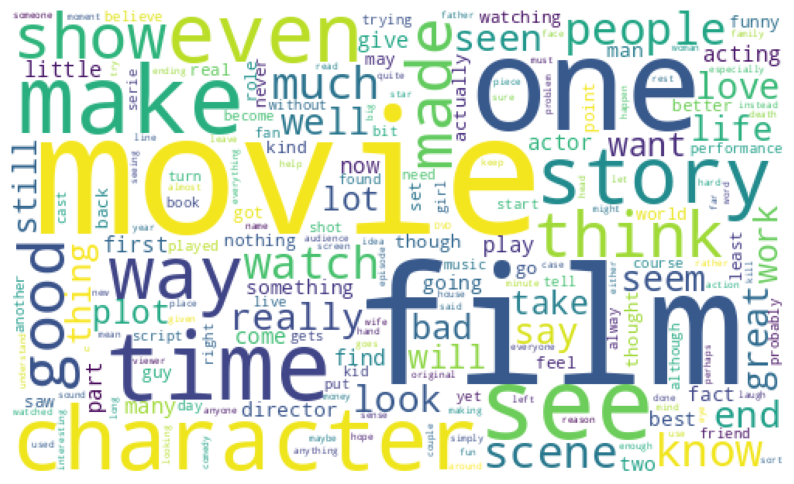

In [ ]:
allwords=' '.join(rvw for rvw in data['review'] )
wordCloud=WordCloud(width=500,height=300,background_color='white', max_font_size=110).generate(allwords)
plt.figure(figsize=(10, 8))
plt.imshow(wordCloud)
plt.axis('off')
plt.show

In [ ]:
def word(sentiment, data):

    sentiment_data = data[data['sentiment'] == sentiment]

    all_words = ' '.join(sentiment_data['review'])

    #Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    #Plot word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word Cloud for Sentiment: {}'.format(sentiment))
    plt.axis('off')
    plt.show()

In [ ]:
unique_sentiments = data['sentiment'].unique()
print("Unique sentiment values:", unique_sentiments)
sentiment_1_reviews = data[data['sentiment'] == 1]['review']
print("Number of reviews with sentiment value '1':", len(sentiment_1_reviews))
print("Sample reviews with sentiment value '1':")
print(sentiment_1_reviews.head())

Unique sentiment values: [1 0]
Number of reviews with sentiment value '1': 24884
Sample reviews with sentiment value '1':
0    One of the other reviewers has mentioned that ...
1    A wonderful little production. The filming tec...
2    I thought this was a wonderful way to spend ti...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
Name: review, dtype: object


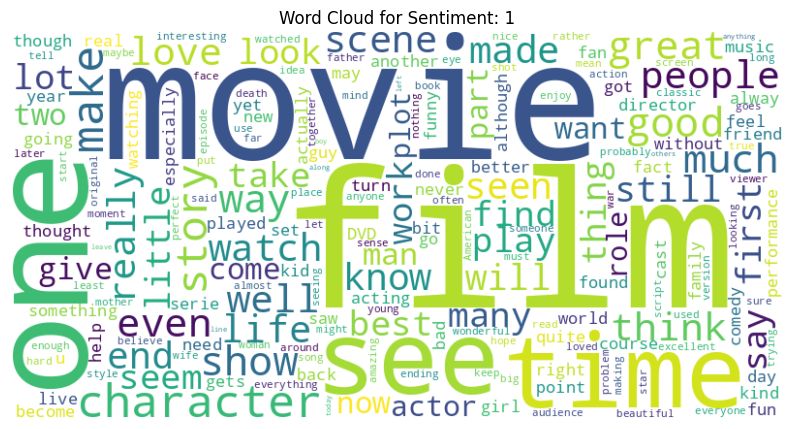

In [ ]:
word(1, data)  # For positive sentiment

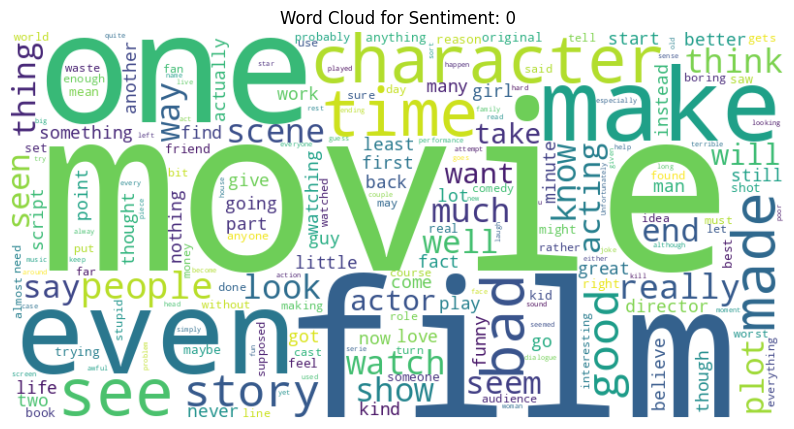

In [ ]:
word(0, data) # For negative sentiment

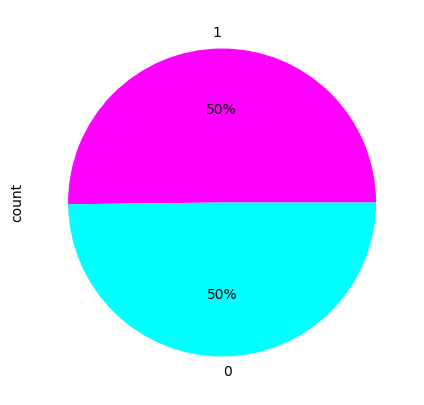

In [ ]:
data.sentiment.value_counts().plot(kind='pie' , autopct='%1.0f%%' , figsize=(5,5) , colors=["magenta" , "cyan"])
plt.show()

We found about 50.19% positive review and the rest are negative review.

In [ ]:
lbl = preprocessing.LabelEncoder()
data['sentiment']=lbl.fit_transform(data['sentiment'])
data.sentiment.value_counts()

sentiment
1    24884
0    24698
Name: count, dtype: int64

In [ ]:
Rvw=data['review'].copy()
Snt=data['sentiment'].copy()

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop=stopwords.words('english')
stemmer=SnowballStemmer("english")

In [ ]:
def cleaner(review):
  review=review.lower()
  review=re.sub(r'<.*?/>' , ' ' , review)
  review=re.sub(r'#\w+' , ' ' , review)
  review=re.sub(r'<\d+' , ' ' , review)
  review=re.sub(r'@/^\w\s' , ' ' , review)
  review=re.sub(r'http//\s+' , ' ' , review)
  review=re.sub(r'^A-Za-z0-9' , ' ' , review)
  review=' '.join([word for word in review.split() if not word in stop])
  review=' '.join(stemmer.stem(word) for word in review.split())
  review=review.strip()
  return review

In [ ]:
Rvw_clean=Rvw.apply(cleaner)
Rvw_clean

0        one review mention watch 1 oz episod hooked. r...
1        wonder littl production. film techniqu unassum...
2        thought wonder way spend time hot summer weeke...
3        basic there famili littl boy (jake) think ther...
4        petter mattei "love time money" visual stun fi...
                               ...                        
49995    thought movi right good job. creativ origin fi...
49996    bad plot, bad dialogue, bad acting, idiot dire...
49997    cathol taught parochi elementari school nuns, ...
49998    i'm go disagre previous comment side maltin on...
49999    one expect star trek movi high art, fan expect...
Name: review, Length: 49582, dtype: object

In [ ]:
tfidfv=TfidfVectorizer()
tfidfv.fit(Rvw_clean)
Rvw=tfidfv.transform(Rvw_clean)

In [ ]:
Rvw_train, Rvw_test , Snt_train , Snt_test= train_test_split(Rvw , Snt , train_size=0.7)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7465
           1       0.85      0.87      0.86      7410

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



<BarContainer object of 1 artists>

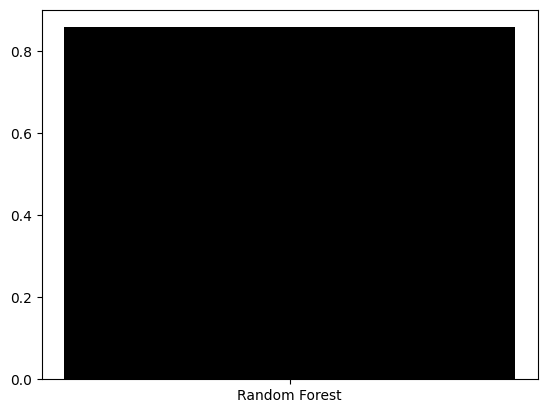

In [ ]:
#Random forest
Rf_class = RandomForestClassifier(n_estimators=500, random_state=0)
Rf_class.fit(Rvw_train, Snt_train)
Snt_pr_rf= Rf_class.predict(Rvw_test)
print(classification_report(Snt_test , Snt_pr_rf))
rf_acc=accuracy_score(Snt_test , Snt_pr_rf)
plt.bar(['Random Forest'], [rf_acc], color='black')

In [ ]:
random_forest_scores = Rf_class.predict_proba(Rvw_test)[:, 1]

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7465
           1       0.83      0.88      0.86      7410

    accuracy                           0.85     14875
   macro avg       0.85      0.85      0.85     14875
weighted avg       0.85      0.85      0.85     14875



<BarContainer object of 1 artists>

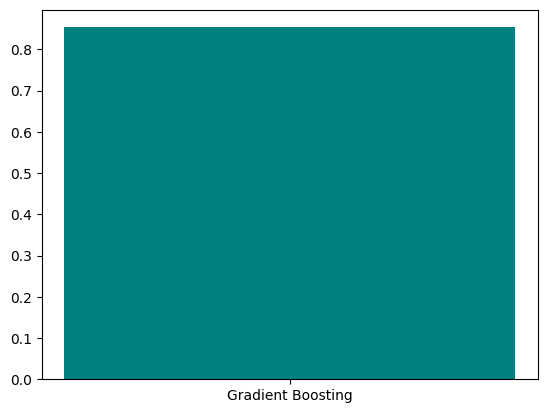

In [ ]:
#Gradiant boosting
gb_class = GradientBoostingClassifier(n_estimators=500, random_state=0)
gb_class.fit(Rvw_train, Snt_train)
Snt_pr_gb = gb_class.predict(Rvw_test)
print(classification_report(Snt_test, Snt_pr_gb))
gb_acc=accuracy_score(Snt_test , Snt_pr_gb)
plt.bar(['Gradient Boosting'], [gb_acc], color='teal')

In [ ]:
gradient_boosting_scores = gb_class.decision_function(Rvw_test)
print(gradient_boosting_scores)

[ 0.99587247  1.92290734  1.87430682 ...  2.27684684 -0.72852066
 -4.95094934]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7465
           1       0.88      0.90      0.89      7410

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



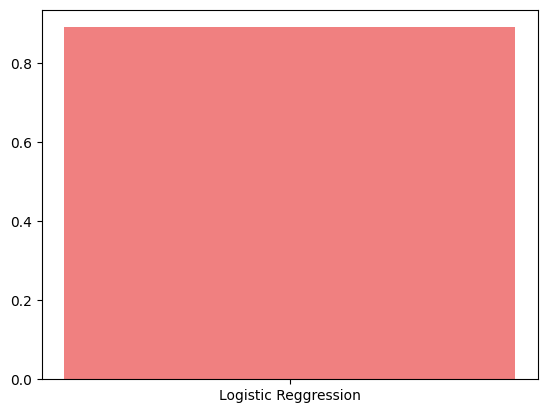

In [ ]:
#Logistic reggression
log_class=LogisticRegression(random_state=0)
log_class.fit(Rvw_train, Snt_train)
Snt_pr_log=log_class.predict(Rvw_test)
print(classification_report(Snt_test , Snt_pr_log))
log_acc=accuracy_score(Snt_test , Snt_pr_log)
plt.bar(['Logistic Reggression'], [log_acc], color='lightcoral')
logistic_regression_scores = log_class.decision_function(Rvw_test)

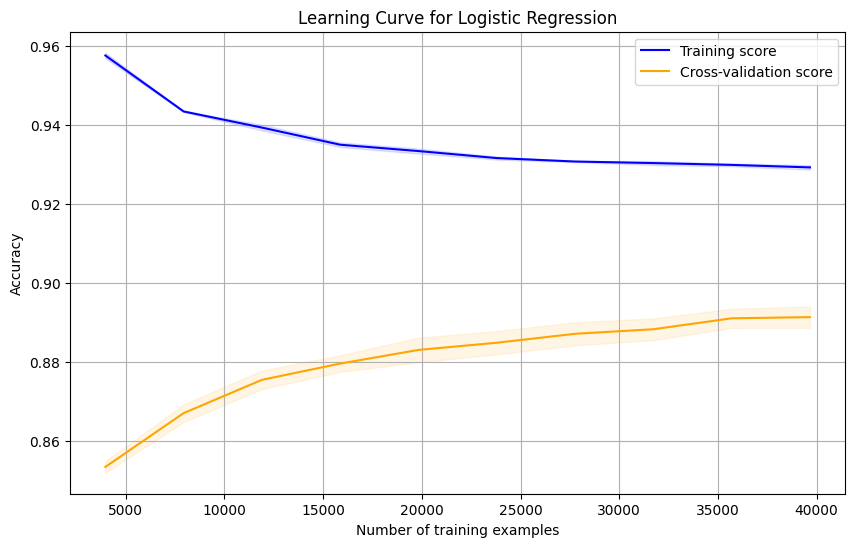

In [ ]:
from sklearn.model_selection import learning_curve

#Define the logistic regression model
log_class = LogisticRegression(random_state=0)

#Generate a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    log_class, Rvw, Snt, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

#Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')

#Add labels and title
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
#SVM
#Split the data
X_train, X_test, y_train, y_test = train_test_split(Rvw, Snt, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

#Train the SVM classifier
svm_classifier.fit(Rvw_train, Snt_train)

#Predict on the testing set
Snt_pred_svm = svm_classifier.predict(Rvw_test)

#Evaluate the model
svm_accuracy = accuracy_score(Snt_test, Snt_pred_svm)
print("Accuracy:", svm_accuracy)
print("Classification Report:")
print(classification_report(Snt_test, Snt_pred_svm))


Accuracy: 0.894453781512605
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7465
           1       0.89      0.90      0.90      7410

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



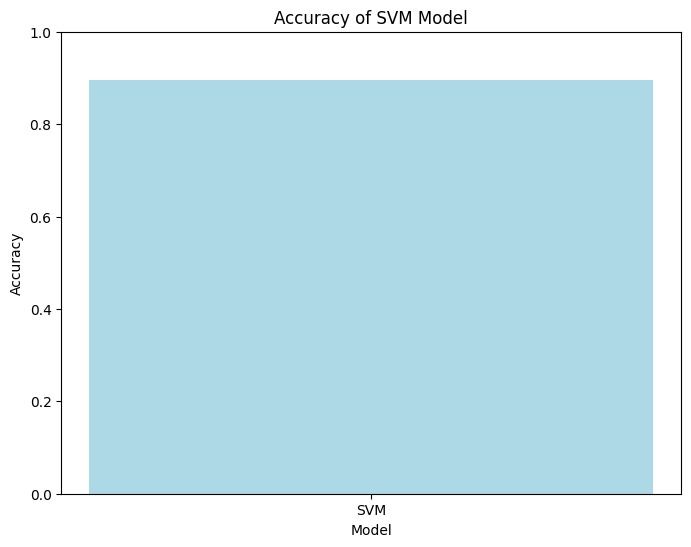

In [ ]:
#Plot the result
plt.figure(figsize=(8, 6))
plt.bar(['SVM'], [svm_accuracy], color='lightblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM Model')
plt.ylim(0, 1)
plt.show()

In [ ]:
svm_scores = svm_classifier.decision_function(Rvw_test)

Accuracy: 0.7174453781512605
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      7465
           1       0.71      0.72      0.72      7410

    accuracy                           0.72     14875
   macro avg       0.72      0.72      0.72     14875
weighted avg       0.72      0.72      0.72     14875



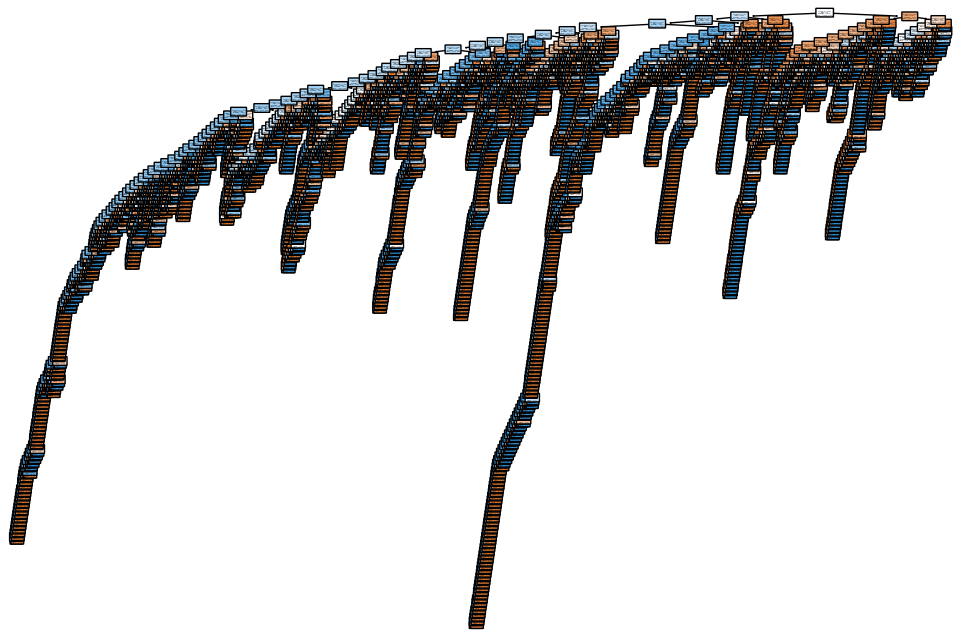

In [ ]:
#Decision Tree

X_train, X_test, y_train, y_test = train_test_split(Rvw, Snt, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=0)

#Train the Decision Tree classifier
decision_tree.fit(Rvw_train, Snt_train)

#Predict on the testing set
Snt_pred_dt = decision_tree.predict(Rvw_test)

DT_accuracy = accuracy_score(Snt_test, Snt_pred_dt)
print("Accuracy:", DT_accuracy)
print("Classification Report:")
print(classification_report(Snt_test, Snt_pred_dt))

#Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, class_names=['Negative', 'Positive'], rounded=True)
plt.show()

In [ ]:
decision_tree_scores = decision_tree.predict_proba(Rvw_test)[:, 1]

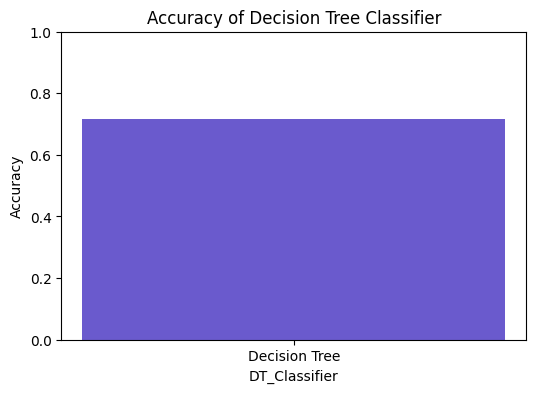

In [ ]:
#Plot accuracy using a bar chart
plt.figure(figsize=(6, 4))
plt.bar(["Decision Tree"], [DT_accuracy], color='slateblue')
plt.title("Accuracy of Decision Tree Classifier")
plt.xlabel("DT_Classifier")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

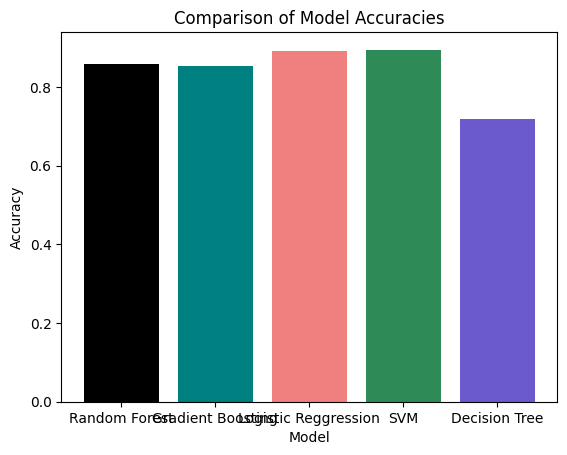

In [ ]:
models = ['Random Forest', 'Gradient Boosting', 'Logistic Reggression', 'SVM', 'Decision Tree']
accuracies = [rf_acc, gb_acc, log_acc, svm_accuracy, DT_accuracy]
colors = ['black', 'teal', 'lightcoral', 'seagreen', 'slateblue']
plt.bar(models, accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

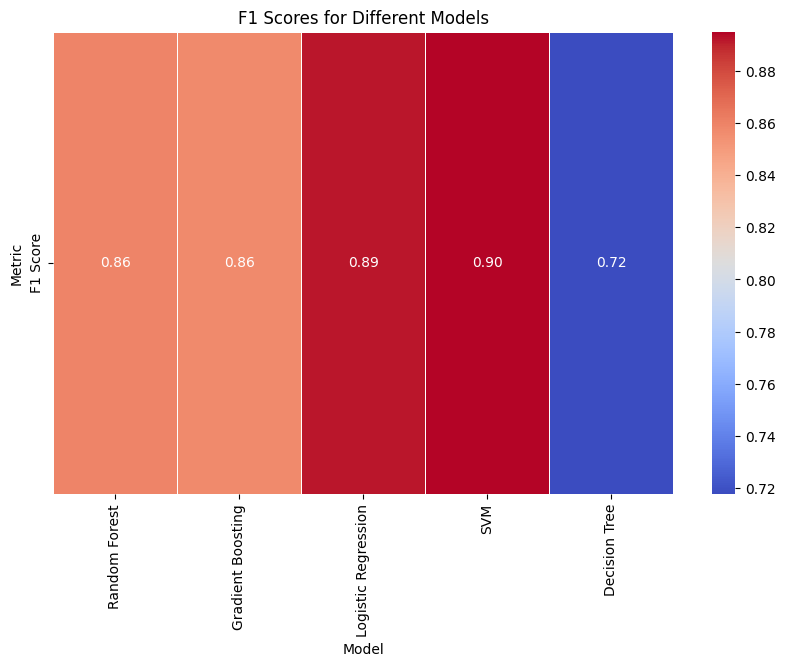

In [ ]:
#Calculate classification report for each model
report_rf = classification_report(Snt_test, Snt_pr_rf, output_dict=True)
report_gb = classification_report(Snt_test, Snt_pr_gb, output_dict=True)
report_lr = classification_report(Snt_test, Snt_pr_log, output_dict=True)
report_svm = classification_report(Snt_test, Snt_pred_svm, output_dict=True)
report_dt = classification_report(Snt_test, Snt_pred_dt, output_dict=True)


f1_scores = {
    'Random Forest': report_rf['1']['f1-score'],
    'Gradient Boosting': report_gb['1']['f1-score'],
    'Logistic Regression': report_lr['1']['f1-score'],
    'SVM': report_svm['1']['f1-score'],
    'Decision Tree': report_dt['1']['f1-score']
}

#Creating DataFrame from the F1 scores
df_f1_scores = pd.DataFrame(f1_scores, index=['F1 Score'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_f1_scores, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('F1 Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Metric')
plt.show()

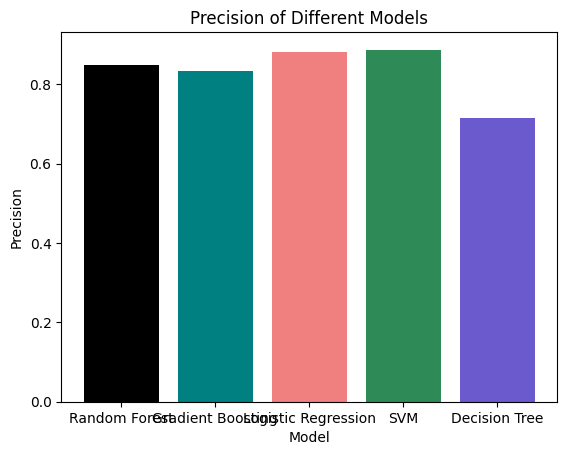

In [ ]:
from sklearn.metrics import precision_score
#Calculate precision for each model
precision_rf = precision_score(Snt_test, Snt_pr_rf)
precision_gb = precision_score(Snt_test, Snt_pr_gb)
precision_log = precision_score(Snt_test, Snt_pr_log)
precision_svm = precision_score(Snt_test, Snt_pred_svm)
precision_dt = precision_score(Snt_test, Snt_pred_dt)

models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'SVM', 'Decision Tree']
precisions = [precision_rf, precision_gb, precision_log, precision_svm, precision_dt]
colors = ['black', 'teal', 'lightcoral', 'seagreen', 'slateblue']

#Plot the precision graph
plt.bar(models, precisions, color=colors)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.show()

In [ ]:
from sklearn.metrics import recall_score

recall_rf = recall_score(Snt_test, Snt_pr_rf)
recall_gb = recall_score(Snt_test, Snt_pr_gb)
recall_log = recall_score(Snt_test, Snt_pr_log)
recall_svm = recall_score(Snt_test, Snt_pred_svm)
recall_dt = recall_score(Snt_test, Snt_pred_dt)

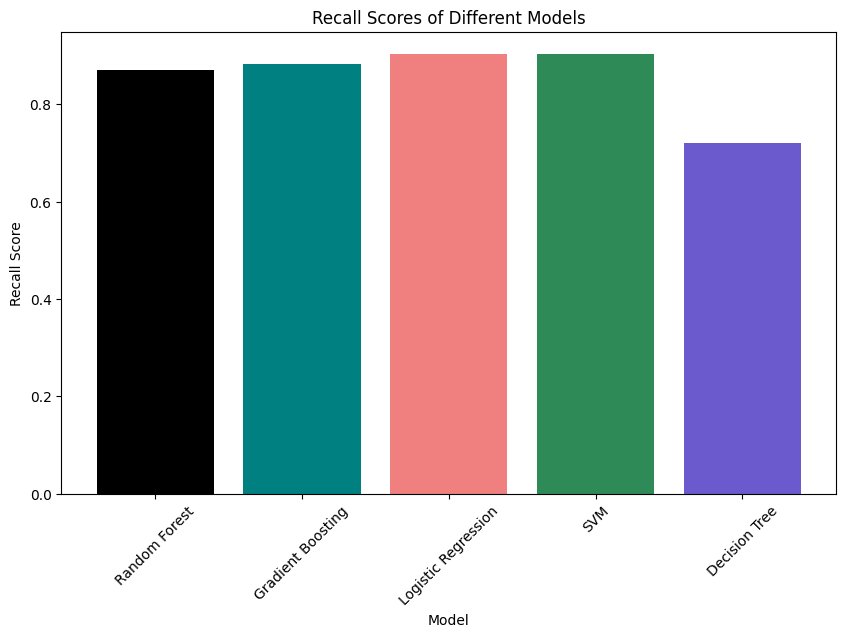

In [ ]:
models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'SVM', 'Decision Tree']
recall_scores = [recall_rf, recall_gb, recall_log, recall_svm, recall_dt]
colors = ['black', 'teal', 'lightcoral', 'seagreen', 'slateblue']

#Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, recall_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.title('Recall Scores of Different Models')
plt.xticks(rotation=45)
plt.show()

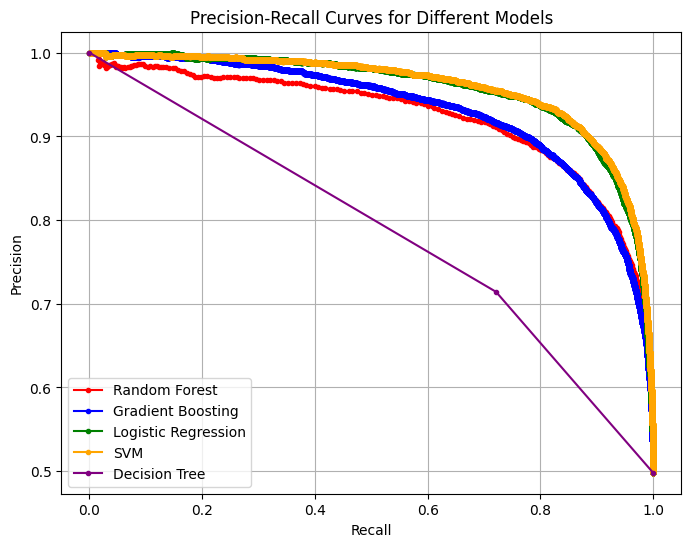

In [ ]:
from sklearn.metrics import precision_recall_curve

models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'SVM', 'Decision Tree']
colors = ['red', 'blue', 'green', 'orange', 'purple']
Snt_scores=[random_forest_scores, gradient_boosting_scores, logistic_regression_scores, svm_scores, decision_tree_scores]

plt.figure(figsize=(8, 6))

for i in range(len(models)):
    precision, recall, _ = precision_recall_curve(Snt_test, Snt_scores[i])
    plt.plot(recall, precision, marker='.', color=colors[i], label=models[i])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import joblib
joblib.dump(svm_classifier, '/content/drive/MyDrive/Dataset/svm_model.pkl')

['/content/drive/MyDrive/Dataset/svm_model.pkl']

In [ ]:

def predict_sentiment(review):
    # Clean the review
    cleaned_review = cleaner(review)
    # Tokenize and transform the review using the TfidfVectorizer
    review_vectorized = tfidfv.transform([cleaned_review])
    # Predict the sentiment using the trained SVM classifier
    predicted_sentiment = svm_classifier.predict(review_vectorized)
    return predicted_sentiment[0]


In [ ]:
review = "This movie was fantastic! I loved every moment of it."
predicted_sentiment = predict_sentiment(review)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: 1


In [ ]:
review = "This movie was disgusting! I hate every moment of it."
predicted_sentiment = predict_sentiment(review)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: 0
